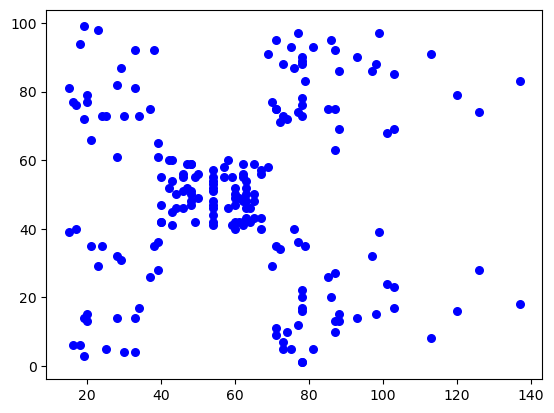

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


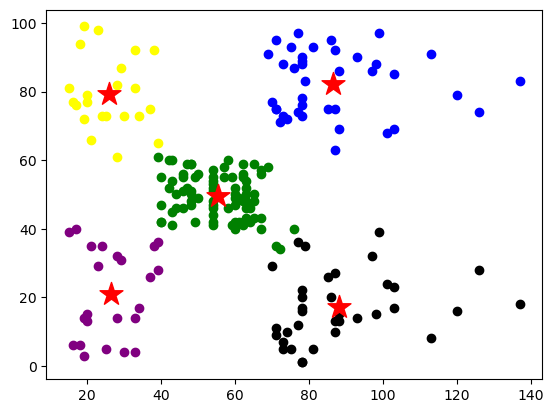

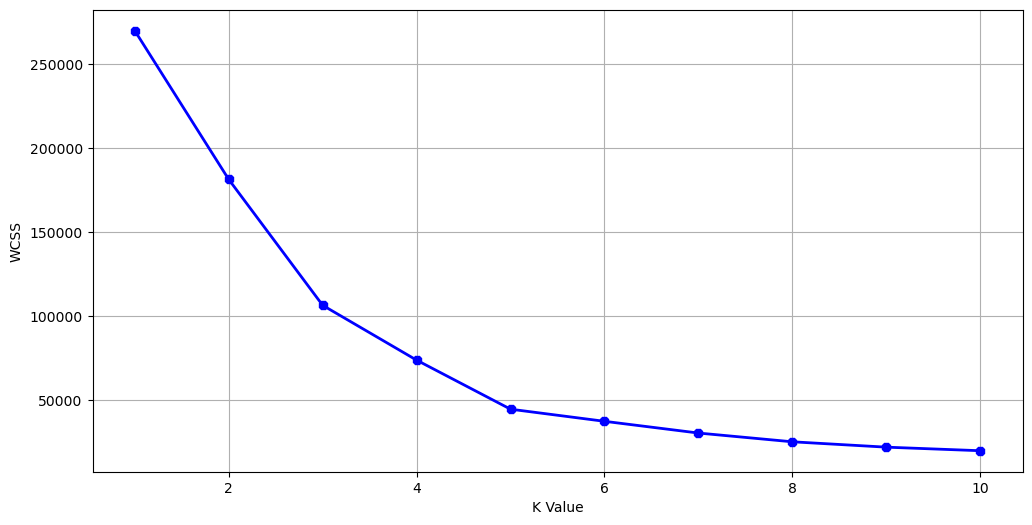

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("E:/New folder/Mall_Customers.csv")
data

data['A']=data[['Annual Income (k$)']]
data['B']=data[['Spending Score (1-100)']]

x=data[['A','B']]
x.head()

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x['A'],x['B'],s=30,c='b')
plt.show()

import warnings
warnings.filterwarnings('ignore')
Kmean=KMeans(n_clusters=5)
Kmean.fit(x)
centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

clusters=Kmean.fit_predict(x)
data['label']=clusters
data.head(10)

col=['blue','purple','yellow','black','green']
for i in range(5):
    a=col[i]
    plt.scatter(data.A[data.label==i],data.B[data.label==i],c=a,label='Cluster')
plt.scatter(centers[:,0],centers[:,1],marker='*',s=300,c='r',label='Centroid')

y=x.loc[:,['A','B']].values
y

wcss=[]
for j in range(1,11):
    kmeans=KMeans(n_clusters=j,init='k-means++')
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()
